In [ ]:
%matplotlib inline

# Deep Learning with PyTorch Neural Networks Tutorial

This tutorial is adapted from [the PyTorch Tutorials](https://pytorch.org/tutorials/), valuable references for learning the fundamentals of Deep Learning with PyTorch. We highly recommend exploring other tutorials for a deeper understanding and additional topics.

In this tutorial, we'll learn about ``torch.nn``, which is used to build Neural Networks for Deep Learning in PyTorch. It's essential to note that ``nn`` relies on ``autograd`` for model definition and differentiation. Review the ``torch.autograd`` [tutoral](https://github.com/darinz/DL-PT-Autograd) prior to starting this one.

An instance of an ``nn.Module`` comprises layers, accompanied by a ``forward(input)`` method that yields the corresponding ``output.``

Consider this neural network designed for classifying digit images, for instance:

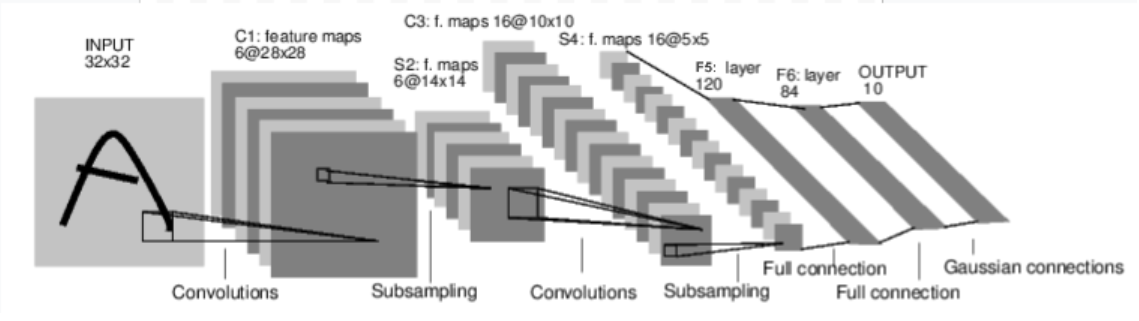

   convnet

It operates as a straightforward feed-forward network, where the input undergoes sequential processing through multiple layers before producing the final output.

The standard training protocol for a neural network involves the following steps:

- Define the neural network, incorporating learnable parameters (weights).
- Iterate through a dataset of inputs.
- Channel the input through the network.
- Calculate the loss, representing the deviation of the output from the correct values.
- Backpropagate gradients into the network's parameters.
- Adjust the weights of the network, usually employing a basic update rule: `weight = weight - learning_rate * gradient`.

## Network Definition

Now, we'll outline the structure of this network:

In [ ]:
# Import the PyTorch library
import torch

# Import the neural network module from PyTorch
import torch.nn as nn

# Import the functional interface to neural network operations
import torch.nn.functional as F

In [ ]:
# Define a neural network class named Net, which inherits from nn.Module
class Net(nn.Module):

    # Constructor method to initialize the network's architecture
    def __init__(self):
        # Call the constructor of the parent class (nn.Module)
        super(Net, self).__init__()

        # Define the first convolutional layer with 1 input channel, 6 output channels, and a 5x5 kernel
        self.conv1 = nn.Conv2d(1, 6, 5)

        # Define the second convolutional layer with 6 input channels, 16 output channels, and a 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, 5)

        # Define the first fully connected (linear) layer with input size 16*5*5 and output size 120
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension 

        # Define the second fully connected (linear) layer with input size 120 and output size 84
        self.fc2 = nn.Linear(120, 84)

        # Define the third fully connected (linear) layer with input size 84 and output size 10
        self.fc3 = nn.Linear(84, 10)

    # Forward method specifying the data flow through the network
    def forward(self, x):
        # Apply max pooling over a (2, 2) window after applying the first convolution and ReLU activation
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))

        # Apply max pooling over a (2, 2) window after applying the second convolution and ReLU activation
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) # If the size is a square, you can specify with a single number

        # Flatten the tensor, maintaining the batch dimension, to prepare for the fully connected layers
        x = torch.flatten(x, 1)

        # Apply ReLU activation to the output of the first fully connected layer
        x = F.relu(self.fc1(x))

        # Apply ReLU activation to the output of the second fully connected layer
        x = F.relu(self.fc2(x))

        # Output layer without activation function for classification
        x = self.fc3(x)

        # Return the final output
        return x

In [ ]:
# Create an instance of the Net class, initializing the neural network
net = Net()

# Print the details of the neural network architecture
print(net)

Simply define the ``forward`` function, and the ``backward`` function, responsible for gradient computation, is automatically generated through ``autograd.``

The ``forward`` function can leverage any Tensor operations.

To access the learnable parameters of a model, use the ``net.parameters()`` method.

The code below accomplishes the following:
- The `net.parameters()` method returns an iterable containing all the learnable parameters of the neural network.
- The `params` list is created to store these parameters for easy access.
- The first `print` statement outputs the total number of parameter groups in the network.
- The second `print` statement displays the size of the weight tensor of the first convolutional layer (`conv1`).

In [ ]:
# Retrieve the learnable parameters of the neural network and store them in the 'params' list
params = list(net.parameters())

# Print the total number of parameter groups in the network
print(len(params))

# Print the size of the weight tensor of the first convolutional layer (conv1)
print(params[0].size())  # conv1's .

Let's test the network with a random 32x32 input. Please note that the expected input size for this network (LeNet) is 32x32. If you intend to use this network on the MNIST dataset, make sure to resize the images from the dataset to 32x32.

The code below accomplishes the following:
- The `torch.randn` function is used to create a random input tensor with dimensions (1, 1, 32, 32), representing a single-channel 32x32 image.
- The `net(input)` statement performs the forward pass, passing the input through the neural network, and computes the output.
- The `print(out)` statement displays the resulting output tensor obtained from the forward pass.

In [ ]:
# Generate a random input tensor with dimensions 1x1x32x32 (batch size 1, 1 channel, 32x32 image)
input = torch.randn(1, 1, 32, 32)

# Pass the input through the neural network (forward pass) and obtain the output
out = net(input)

# Print the output tensor resulting from the forward pass
print(out)

Reset the gradient buffers for all parameters to zero and perform backpropagation with random gradients.

The code below accomplishes the following:

- `net.zero_grad()` sets the gradients of all parameters in the neural network to zero, preparing for a new gradient computation.
- `torch.randn(1, 10)` creates a tensor with random values of size (1, 10). This tensor serves as the gradient for the output.
- `out.backward(torch.randn(1, 10))` performs backpropagation, computing gradients with respect to the random values provided. These gradients are then used to update the model parameters during the optimization step.

In [ ]:
# Zero the gradient buffers of all parameters in the neural network
net.zero_grad()

# Perform backpropagation by computing gradients with respect to a tensor of random values
# The tensor dimensions are (1, 10), which matches the size of the output tensor
out.backward(torch.randn(1, 10))

<div class="alert alert-info"><h4>Note</h4><p>The "torch.nn" module exclusively supports mini-batches. The entire "torch.nn" package is designed to handle inputs in the form of mini-batches of samples, and it does not support a single-sample input.

    For instance, ``nn.Conv2d`` expects a 4D Tensor with dimensions ``nSamples x nChannels x Height x Width``.

    If you have a single sample, you can use ``input.unsqueeze(0)`` to introduce a dummy batch dimension.
</p></div>

Before moving forward, let's summarize the key classes for Deep Learning with PyTorch.

**Key Classes:**
  -  ``torch.Tensor`` - A *multi-dimensional array* supporting autograd operations like ``backward()`` and *storing the gradient* with respect to the tensor.
  -  ``nn.Module`` - A module for neural networks, providing a convenient way to encapsulate parameters, with utilities for tasks such as GPU migration, exporting, and loading.
  -  ``nn.Parameter`` - A Tensor subtype that is *automatically registered as a parameter when assigned as an attribute to a* ``Module``.
  -  ``autograd.Function`` - Defines *forward and backward operations of an autograd operation*. Each ``Tensor`` operation creates at least one ``Function`` node that links to functions creating the ``Tensor`` and *records its history*.

**Up to this point, we've covered:**
  -  Defining a neural network
  -  Processing inputs and performing backward operations

**Still to cover:**
  -  Computing the loss
  -  Updating the network weights

## Loss Function
A loss function operates on the (output, target) pair of inputs and calculates a value indicating the proximity of the output to the target.

The PyTorch `nn` package provides various [loss functions](https://pytorch.org/docs/nn.html#loss-functions). One straightforward loss function is ``nn.MSELoss``, which calculates the mean-squared error between the output and the target.

The code below accomplishes the following:

- `net(input)` generates the output of the neural network for the given input.
- `torch.randn(10)` creates a tensor with random values, serving as a dummy target.
- `target.view(1, -1)` reshapes the target tensor to match the shape of the output.
- `nn.MSELoss()` creates an instance of the mean-squared error loss function.
- `criterion(output, target)` computes the loss by comparing the output and target tensors using the mean-squared error.
- `print(loss)` displays the computed loss.

In [ ]:
# Pass the input through the neural network to obtain the output
output = net(input)

# Create a tensor with random values as a dummy target (example)
target = torch.randn(10)

# Reshape the target tensor to have the same shape as the output
target = target.view(1, -1)

# Instantiate the mean-squared error loss function
criterion = nn.MSELoss()

# Compute the loss by comparing the output and target using the mean-squared error loss
loss = criterion(output, target)

# Print the computed loss
print(loss)

If you trace the ``loss`` in the backward direction and inspect its ``.grad_fn`` attribute, you will observe a computational graph resembling the following:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> flatten -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

Hence, upon invoking ``loss.backward()``, the entire graph undergoes differentiation with respect to the neural network parameters. All Tensors in the graph marked with ``requires_grad=True`` accumulate gradients in their respective ``.grad`` Tensor.

To illustrate, let's backtrack a few steps:

The code below accomplishes the following:

- `loss.grad_fn` displays the gradient function associated with the loss, which is the mean-squared error loss (MSELoss).
- `loss.grad_fn.next_functions[0][0]` reveals the next function in the computation graph, indicating the Linear layer that contributed to the loss.
- `loss.grad_fn.next_functions[0][0].next_functions[0][0]` further shows the subsequent function in the graph, specifying the ReLU activation function that influenced the Linear layer.

In [ ]:
# Print the gradient function associated with the loss (MSELoss)
print(loss.grad_fn)

# Print the next function in the computation graph (Linear layer) that contributed to the loss
print(loss.grad_fn.next_functions[0][0])

# Print the subsequent function in the graph (ReLU activation) that contributed to the Linear layer
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

## Backpropagation

To initiate backpropagation of the error, simply execute ``loss.backward()``. However, it's crucial to clear the existing gradients beforehand; otherwise, the gradients will accumulate onto the existing ones.

Now, let's invoke ``loss.backward()`` and examine the gradients of conv1's bias before and after the backward pass.

The code below accomplishes the following:

- `net.zero_grad()` sets the gradients of all parameters in the neural network to zero before initiating the backward pass.
- `print('conv1.bias.grad before backward')` outputs the gradient of the bias associated with the conv1 layer before the backward pass.
- `loss.backward()` performs backpropagation to compute gradients.
- `print('conv1.bias.grad after backward')` displays the gradient of the conv1 layer's bias after the backward pass, indicating the updated values.

In [ ]:
# Zero the gradient buffers of all parameters in the neural network
net.zero_grad()

# Display the gradient of conv1's bias before backward pass
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

# Perform backpropagation to compute gradients and update parameters
loss.backward()

# Display the gradient of conv1's bias after backward pass
print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

Now, we've covered the usage of loss functions.

**Further Reading:**

The neural network package encompasses diverse modules and loss functions that constitute the fundamental components of deep neural networks. You can find a comprehensive list with documentation in the [PyTorch Docs](https://pytorch.org/docs/nn).

**The final topic to explore is:**

- Modifying the weights of the network

## Weight Update

The most commonly employed update rule in practice is Stochastic Gradient Descent (SGD):

```python
# Update rule for weights using Stochastic Gradient Descent (SGD)
# weight: Current weight tensor
# learning_rate: Rate at which the weights are updated
# gradient: Gradient of the loss with respect to the weight
weight = weight - learning_rate * gradient
```

The code above accomplishes the following:
- `weight`: Represents the current weight tensor.
- `learning_rate`: Denotes the rate at which the weights are updated during each iteration.
- `gradient`: Signifies the gradient of the loss concerning the specific weight.
- The formula `weight = weight - learning_rate * gradient` illustrates the update rule for weights using Stochastic Gradient Descent (SGD). This rule adjusts the weights in the opposite direction of the gradient to minimize the loss during training.

This can be implemented using straightforward Python code:

```python
# Set the learning rate for weight updates
learning_rate = 0.01

# Iterate over the parameters of the neural network
for parameter in net.parameters():
    # Update the parameter data using the specified learning rate and its gradient
    parameter.data.sub_(parameter.grad.data * learning_rate)
```

The code above accomplishes the following:
- `learning_rate`: Specifies the rate at which the weights are updated during each iteration of training.
- The `for parameter in net.parameters():` loop iterates over all the parameters of the neural network (`net`).
- `parameter.data.sub_(parameter.grad.data * learning_rate)` performs the weight update using Stochastic Gradient Descent (SGD). It subtracts the product of the gradient and the learning rate from the current parameter values.

Nevertheless, while working with neural networks, you'll likely want to employ different update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc. To facilitate this, there is a convenient package called ``torch.optim`` that implements these methods. Utilizing it is quite straightforward:

```python
# Import the optimizer module from PyTorch
import torch.optim as optim

# Create an optimizer instance (Stochastic Gradient Descent in this case) for the neural network parameters
optimizer = optim.SGD(net.parameters(), lr=0.01)

# In your training loop:

# Zero the gradient buffers of all parameters
optimizer.zero_grad()

# Forward pass: Compute the output and loss
output = net(input)
loss = criterion(output, target)

# Backward pass: Compute gradients and update parameters
loss.backward()
optimizer.step()    # Update the parameters using the optimizer
```

The code above accomplishes the following:

- `import torch.optim as optim`: Imports the optimizer module from PyTorch.
- `optimizer = optim.SGD(net.parameters(), lr=0.01)`: Creates an instance of the Stochastic Gradient Descent (SGD) optimizer for the neural network parameters with a specified learning rate.
- `optimizer.zero_grad()`: Clears the gradient buffers of all parameters before the backward pass.
- `output = net(input)`: Computes the output of the neural network for the given input.
- `loss = criterion(output, target)`: Calculates the loss based on the output and target.
- `loss.backward()`: Performs the backward pass to compute gradients.
- `optimizer.step()`: Updates the parameters using the optimizer, applying the chosen update rule (e.g., SGD).

<div class="alert alert-info"><h4>Note</h4><p>Note the need to manually reset the gradient buffers to zero using ``optimizer.zero_grad()``. This step is essential since gradients accumulate, as detailed in the `Backpropagation` section.
</p></div>